# Problem Set 7: Facial Recognition
<span style="color:red">WARNING:</span> Some of the problems in this problem set require heavy computation - you are encouraged to start early so that you don't get stuck at the last minute.

In [1]:
%matplotlib inline
import IPython
import pandas as pd
import numpy as np
import IPython
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from scipy.stats import ttest_ind
import statsmodels as sm
import statsmodels.formula.api as smf

# Face Recognition

Your goal for this problem set is to design a basic face recognition system. Since the machine learning force is now strong with you, the prompts for this problem set are deliberately vague. Be creative - but be careful!

One suggestion: Start by implementing this entire problem set on a relatively small subset of all of the images first, before using the full dataset.

## 1. Data Exploration

Download the "[Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)" data set from [this link](http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz) (roughly 250MB).

### 1.1. Filter out people with few images

Display a histogram that shows the number of images per individual (you may use log-scale if you like). Which individual has the most images? Throw away all people for whom you have fewer than 10 images.

In [2]:
 # your code here
import os, sys

# Open a file
path = "lfw_funneled/"
dirs = os.listdir( path )
print('Total number of individual files: ',len(dirs))



Total number of individual files:  5760


In [4]:
path = "lfw_funneled/"
dirs = os.listdir( path )

counter = 0
fiter = 0
# iterate over each folder in data file
for folder in dirs:
    #print(folder)
    # initialise counter and counter number of pics in each file
    if folder.endswith(".txt"):
        print('Not a directory')
    else:       
        counter = 0
        path_ = path +folder+'/'
        dir_fol = os.listdir(path_)
    
        for file in dir_fol:
            #print(file)
            counter +=1
        #print('count: ',counter)
        ## if num of images <10 delete all files then delete emtpty folder
        if counter <10:
            for file in dir_fol:
                file_path= path_+file
                os.remove(file_path)
            path_ = path +folder+'/'
            os.rmdir(path_)
        else:
            fiter+=1
        
print('Total number of individual files with more than 10 images: ',len(dirs))
## check if I have right number of files
print("sum fiter with number of txt files(11): ", fiter + 11)

Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Total number of individual files with more than 10 images:  169
sum fiter with number of txt files(11):  169


### 1.2. Show some faces!

1. Pick 8 random images from the dataset and display them in a 2 x 4 grid.
2. Create a single image that shows the "average face" (acros the entire dataset, not just the 8 random ones) -- i.e., each pixel should display the average value of that pixel across all of the images. 
3. For each pixel, calculate the standard deviation of values for that pixel (you will have a different standard deviation for each of the three color channels, feel free to just show the standard deviation of one of the channels, or to average the standard deviation of the three channels at each pixel). Plot these standard deviations as a heatmap.

What do you notice about the distribution of mean and standard deviation values in these images? (e.g., are they evenly distributed)

#### Display 8 random images from the dataset and display them in a 2 x 4 grid.

Populating the interactive namespace from numpy and matplotlib


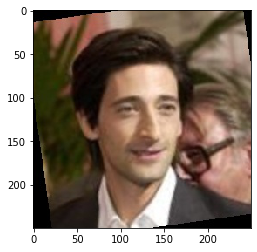

In [5]:
 # plot one random  image
%pylab inline
import matplotlib.image as mpimg
img=mpimg.imread('lfw_funneled\Adrien_Brody\Adrien_Brody_0004.jpg');
imgplot = plt.imshow(img)
plt.show()

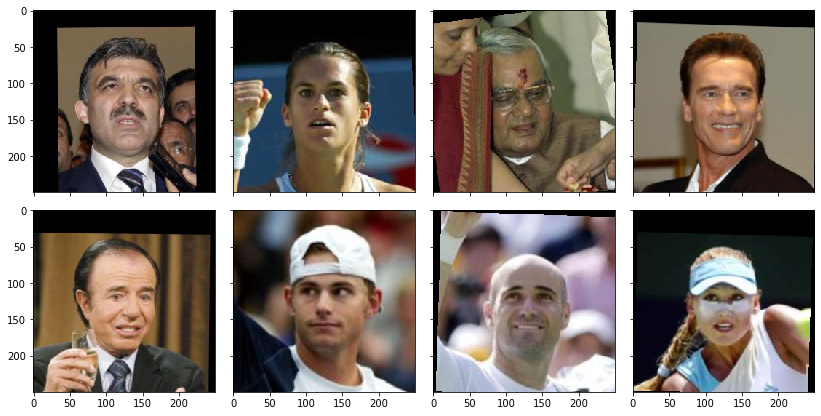

In [6]:
## Display 8 random images from the dataset and display them in a 2 x 4 grid.
from mpl_toolkits.axes_grid1 import ImageGrid
path = "lfw_funneled/"
folders = os.listdir(path)
img_list = []
for ii in range(8):
    index = np.random.randint(0, len(folder))
    folder = folders[index]
    folder_path = path +folder+'/'
    dir_fol = os.listdir(folder_path)
    idx2 = np.random.randint(0, len(dir_fol))
    file = dir_fol[idx2]
    #print(file)
    file_path = folder_path+file 
    img=mpimg.imread(file_path)
    img_list.append(img)
#     imgplot = plt.imshow(img)
#     plt.show()
    
    

fig = plt.figure(figsize=(14., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 4),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img_list ):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

#### Create a single image that shows the "average face" (acros the entire dataset, not just the 8 random ones) -- i.e., each pixel should display the average value of that pixel across all of the images.

In [7]:
img_list = []
for folder in dirs:
    # initialise counter and counter number of pics in each file
    if folder.endswith(".txt"):
        print('Not a directory')
    else:       
        folder_path = path +folder+'/'
        dir_fol = os.listdir(folder_path)
        for file in dir_fol:
            file_path = folder_path+file 
            img=mpimg.imread(file_path)
            img_list.append(img)
            
print(len(img_list))            
    

Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
Not a directory
4324


In [8]:
## mean image
mean_image = np.mean(np.array(img_list), axis = 0)
print('mean_image shape: ',mean_image.shape)


mean_image shape:  (250, 250, 3)


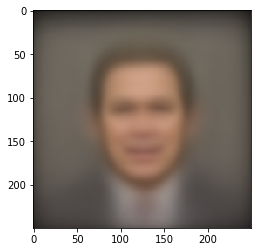

In [9]:
from PIL import Image
result = Image.fromarray(mean_image.astype('uint8'))
## display mean image
implot = plt.imshow(result)
plt.show()

#### For each pixel, calculate the standard deviation of values for that pixel (you will have a different standard deviation for each of the three color channels, feel free to just show the standard deviation of one of the channels, or to average the standard deviation of the three channels at each pixel). Plot these standard deviations as a heatmap.

In [10]:
## standard deviation for each pixel
stdev_image = np.std(np.array(img_list), axis = 0)
print('stdev_image shape: ',stdev_image.shape)

stdev_image shape:  (250, 250, 3)


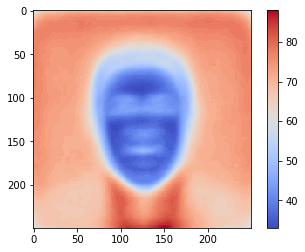

In [11]:
mean_stdev_image = np.mean(stdev_image,axis =2)
result_ = Image.fromarray(mean_stdev_image.astype('uint8'))
## display heat map of average standard dev values
implot = plt.imshow(result_,cmap='coolwarm')
plt.colorbar()
plt.show()

*Enter your observations here*

## 2. k-Means Clustering


### 2.1. Implementation

Implement the k-Means clustering algorithm that we discuseed in class, using the Euclidean distance function. This will require that you define three new functions:
1. InitializeCentroids(X, k)
2. FindClosestCentroids(X, centroids)
3. ComputeCentroidMeans(X, centroids, k)

*Hint:* You may find  the [`pairwise_distances_argmin`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html) function useful.

In [20]:
def InitializeCentroids(X,k,seed):
    np.random.seed(seed)
    idxes = np.random.choice(X.shape[0], k,seed)
    centroids = X[idxes]
    return centroids
                               
                               

In [21]:
from sklearn.metrics import pairwise_distances_argmin
def FindClosestCentroids(X, centroids):
    cluster_id = pairwise_distances_argmin(X,centroids)
    #print(dist_2_centroid)
    #cluster_id = np.argmin(dist_2_centroid, axis = 1)
    return cluster_id
    
    

In [22]:
def ComputeCentroidMeans(X, centroids, k,idx):
    new_centroids  = []
    for i in range(k): 
        data = X[idx == i].mean(axis = 0)
#         print(data)
        new_centroids.append(data)
    return np.array(new_centroids)
        
        

In [23]:
from sklearn.metrics import pairwise_distances_argmin

def ClusterKM(X, k, seed=100):
    np.random.seed(seed)
    # Randomly choose clusters
    centroids = InitializeCentroids(X,k,seed)
    #print(centroids)
    while True:
        # Assign labels based on closest center
        idx = FindClosestCentroids(X, centroids)
        new_centroids = ComputeCentroidMeans(X, centroids, k,idx)
#         print(centroids)
#         print(new_centroids)
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, idx

### 2.2. Sanity check

Apply your k-Means algorithm to a toy dataset to make sure it works properly. 

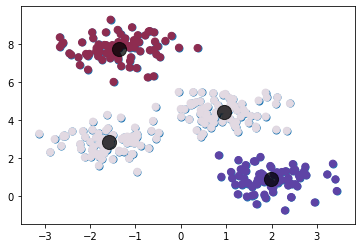

In [207]:
# does everything work as expected?

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

myCenters, myIdx = ClusterKM(X, 4)

plt.scatter(X[:, 0], X[:, 1], c=myIdx, s=50, cmap='twilight')
plt.scatter(myCenters[:, 0], myCenters[:, 1], c='black', s=200, alpha=0.75);

### 2.3. Image centroids
Apply your k-Means algorithm to the images dataset, using k=20. Make sure to normalize your data first! Show a 20 x 2 grid of images where the first column contains (a) the image that represents the centroid for each of those clusters, and the second column contains (b) the closest image in the original dataset to that centroid. Use Euclidean distance. What do you notice?

*Note:* As you may notice, there are $250*250*3 = 187500$ features for each image. If your k-Means algorithm is not implemented efficiently -- an even if it is! -- it might take a long time for your algorithm to converge. If your computer is old, it might even take a very long time for you to simply normalize your data. If you are running into such problems, you may convert your RGB images into greyscale first (using, for instance, the [`rgb2grey`](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2grey) function).



In [18]:
# Running kmeans clustering on date
from skimage.color import rgb2gray
#define data
X=[]
for ii in img_list:
#     print(ii.shape)
    ## convert to gray scale
    ii = rgb2gray(ii)
#     print(ii.shape)
    ## reshape 250*250 image to 62500* 1 array
    X.append(ii.reshape((-1)))
## Normalize data
X = np.array(X)/255


# ClusterKM(X, k, seed=100)

(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)
(250, 250)
(250, 250, 3)


In [24]:
## pply your k-Means algorithm using euclidean dist to the images dataset, using k=20 on normalised data
k =20 
## Run cluster algorith
myCenters, myIdx = ClusterKM(X, k)

In [48]:
ĉen_images = []
for img in myCenters:
    img = img.reshape((250,250))
    ĉen_images.append(img)
    
    

In [49]:
## find closest image to centroids
idx_close = FindClosestCentroids(myCenters,X)
print(idx_close)
for ii in range(len(X)):
    for idx in idx_close: 
        if idx == ii:
            img = X[idx]
            #print(img)
            img = img.reshape((250,250))
            #print(img.shape)
            ĉen_images.append(img)

[2374  399 1634 3174 3649 1165   31 2089 1585 1010 1077 3573  831  331
 3267 2583 2089  537 1280 2883]
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


In [50]:
len(ĉen_images)

40

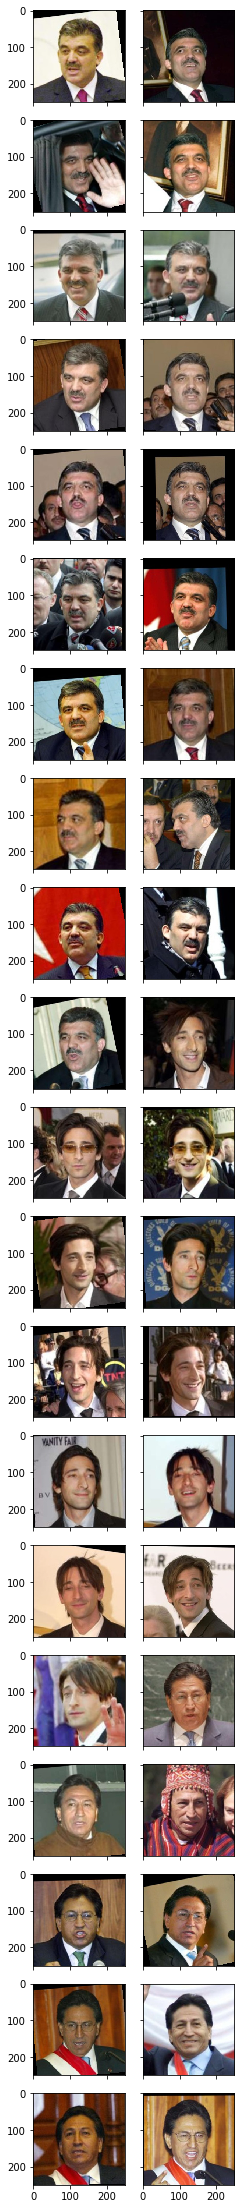

In [53]:
##Show a 20 x 2 grid of images where the first column contains 
## (a) the image that represents the centroid for each of those clusters, and the second column contains 
## (b) the closest image in the original dataset to that centroid.  What do you notice?
fig = plt.figure(figsize=(6., 40.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(20, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, img_list ):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

## Observations:
We notice that the closest images are usually pictures of the same person. which is an indication that our clustering is atleast recognising the same faces as being the same person.

### 2.4 Classify yourself

Take a picture of yourself and scale it so that it is in a similar format to the images in the dataset. Show four images:
 1. The image of yourself
 2. The cluster centroid closest to that image
 3. The closest image in the original dataset to that cluster centroid
 4. The closest image in the original dataset to the image of yourself


In [ ]:
# Your code here

## 3. PCA and Eigenfaces 

Begin by normalizing your data. Then, set aside 50% of the images as "test" data and using the remaining images as "training" data.


### 3.1. How many components?

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn on the training dataset. Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 100. How many components are required to explain 75% of the variation in your original data?

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## data prep
## reshape data and convert to grayscale 
data = rgb2gray(np.array(img_list).reshape(4324, 62500, 3))

# Split scaled data into training(50%) and test(50%)
np.random.shuffle(data)
X_train, X_test = data[:2162,:], data[2162:,:]

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [73]:
## Implement PCA model on data using only one component
# Make an instance of the Model
pca = PCA(n_components= 3)
#fit data
pca.fit(X_train)
## print explained variance
print(pca.explained_variance_ratio_)
np.array(pca.explained_variance_ratio_).sum()

[0.21266727 0.0758466  0.05570623]


0.34422008983726365

In [74]:
## Create a figure showing how the amount of variance explained by your components increases 
## as you increase the number of components from 1 to 100.
val_list = []
for ii in range(1,101):
    # Make an instance of the Model
    pca = PCA(n_components=ii)
    #fit data
    pca.fit(X_train)
    ## print explained variance
    variance = np.array(pca.explained_variance_ratio_).sum()
    
    val_list.append(variance)
    


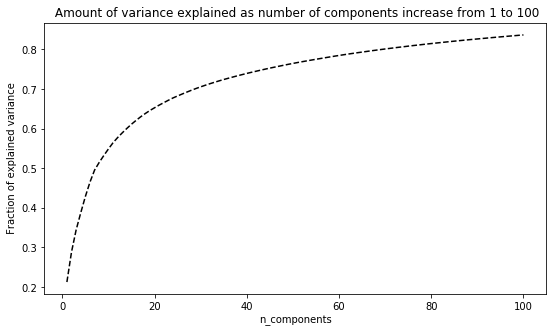

In [81]:
## Create plot
plt.figure(figsize = (9,5))
## Create axis and labels
plt.xlabel('n_components')
plt.ylabel(' Fraction of explained variance')
plt.title(' Amount of variance explained as number of components increase from 1 to 100')

## Plots
plt.plot([i for i in range(1,101)],val_list , 'k--');

In [82]:
## Implement PCA model on data using only one component
# Make an instance of the Model
pca = PCA(0.75)
#fit data
pca.fit(X_train)
## print explained variance
print('n_components explaining 75% of variance: ',len(pca.explained_variance_ratio_))


n_components explaining 75% of variance:  44


*Your observations here*

### 3.2. Eigenfaces

Extract the 10 first principal components (the "eigenfaces") and display them below.

In [4]:
# Enter your code here

### 3.3. Projections, clustering and PCA
 - Project all of the training and test data into the 50-dimensional space defined by the first 50 principal components.
 - Apply k-means clustering, with k=20, to the 50-dimensional projections of the training data. 
 - Display a 4 x 5 grid of images that shows what each of the 20 centroids look like after the centroid is projected back into the original-image space.

In [ ]:
# Enter your code here

### 3.4. Recognition

Create a test set of 10 images using (i) 8 images randomly selected from the test data, (ii)  any other non-face image you can find that has the right dimensions, and (iii) an image of yourself. Create a 10 x 5 grid of images, with one row for each of these images, and 5 columns that contain: 
1. The original image. 
2. The reconstruction of that image after it is projected onto the 50-dimensional eigenface-space and then re-projected back into the original image space. 
3. Find the nearest centroid (from 3.3) to the image, and show the reconstruction of that nearest centroid. 
4. Find the image in the training data whose 50-dimensional representation is closest to that centroid, and show the reconstruction of that image.
5. Show the original training image that was selected in above (step 4 in this list)

In [ ]:
# Enter your code here

### 3.5. (Extra credit) Share your results
Post the following to bCourses for people in the class to see:
 - The photo of yourself
 - The cluster centroid from 2.4 that is closest to that image
 - The closest image in the dataset to that cluster centroid
 - The reconstruction of your image after it has been projected and reprojected (i.e., #2 in 3.4)
 - The nearest centroid to the projection (i.e., #3 in 3.4)
 - The closest training image to that centroid (i.e., #5 in 3.4)

### 3.6. (Extra extra credit) PCA Implementation

Implement PCA yourself, without using sklearn. How does the running time of your algorithm compare to the running time of the sklearn version?

In [5]:
# Enter your code here

### 3.7. (Extra extra extra credit): k-Means++
- In 2.1 you implemented k-Means clustering with random initialization of the centroids. In this part implement the k-Means++ version of the algorithm that uses a "smarter" initialization of the centroids in order to achieve faster convergence. Compare the number of iterations it took k-Means in 2.3 to converge with random initialization to the number of iterations it takes k-Means++. Also compare the sum of squared errors that you obtain for both methods. Use for both k=20 clusters. The following link shows the paper that proposed k-Means++.
http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

*Your observations here*